In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.arange(-5,5,0.25)

In [4]:
x

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
y = x * 1.039 + 12.36

In [6]:
y

array([ 7.165  ,  7.42475,  7.6845 ,  7.94425,  8.204  ,  8.46375,
        8.7235 ,  8.98325,  9.243  ,  9.50275,  9.7625 , 10.02225,
       10.282  , 10.54175, 10.8015 , 11.06125, 11.321  , 11.58075,
       11.8405 , 12.10025, 12.36   , 12.61975, 12.8795 , 13.13925,
       13.399  , 13.65875, 13.9185 , 14.17825, 14.438  , 14.69775,
       14.9575 , 15.21725, 15.477  , 15.73675, 15.9965 , 16.25625,
       16.516  , 16.77575, 17.0355 , 17.29525])

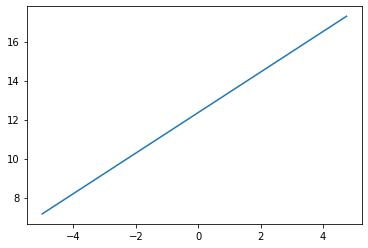

In [7]:
plt.plot(x, y)

In [8]:
# Values of heights in cms
x = np.array([[151],[174],[138],[186],[128],
              [136],[179],[163],[152],[131]])

In [9]:
x.shape

(10, 1)

In [10]:
# Values of weights in kgs
y = np.array([63, 81, 56, 91, 47, 57, 76, 72, 62, 48])

In [11]:
y.shape

(10,)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()

In [14]:
regressor.fit(x, y)

LinearRegression()

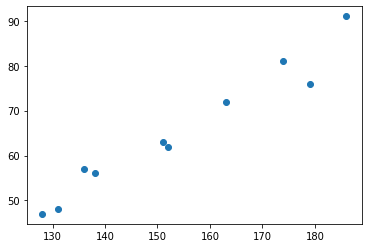

In [15]:
plt.scatter(x, y)

In [16]:
# m
regressor.coef_

array([0.67461045])

In [17]:
# c
regressor.intercept_

-38.45508707607701

In [18]:
regressor.predict([[180]])

array([82.97479377])

In [19]:
regressor.predict([[200]])

array([96.46700275])

#### Regression modeling on real world data

In [25]:
# Location: https://mitu.co.in/dataset
# Dataset: Salary_Data.csv, mtcars.csv
import pandas as pd

In [23]:
df = pd.read_csv('datasets/Salary_Data.csv')

In [26]:
df.shape

(30, 2)

In [27]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [28]:
# separate the input and output variables
x = df[['YearsExperience']]
y = df['Salary']

In [29]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


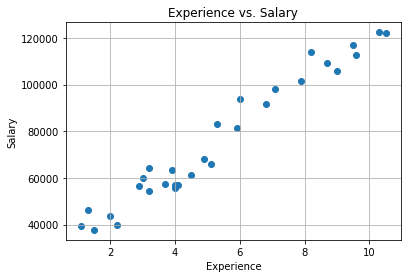

In [30]:
plt.title('Experience vs. Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x, y)

#### Cross-validation

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [34]:
x_train.shape

(22, 1)

In [35]:
x_test.shape

(8, 1)

In [36]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


In [37]:
y_train

17     83088
22    101302
5      56642
16     66029
8      64445
14     61111
23    113812
20     91738
1      46205
29    121872
6      60150
4      39891
18     81363
19     93940
9      57189
7      54445
25    105582
3      43525
0      39343
21     98273
15     67938
12     56957
Name: Salary, dtype: int64

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
regressor = LinearRegression()

In [40]:
regressor.fit(x_train, y_train)

LinearRegression()

In [41]:
# Value of m
regressor.coef_

array([9379.71049195])

In [43]:
# Value of c
regressor.intercept_

26986.691316737248

In [44]:
# Predict on unseen data / test data
y_pred = regressor.predict(x_test)

In [47]:
result = pd.DataFrame({
    'Experience': x_test['YearsExperience'],
    'Actual': y_test,
    'Predicted': y_pred
})

In [48]:
result

,Experience,Actual,Predicted
2,1.5,37731,41056.257055
28,10.3,122391,123597.709384
13,4.1,57081,65443.504334
10,3.9,63218,63567.562235
26,9.5,116969,116093.940990
24,8.7,109431,108590.172597
27,9.6,112635,117031.912039
11,4.0,55794,64505.533285


#### Performance Evaluation

In [52]:
# mean absolute error
np.mean(abs(y_test - y_pred))

3508.5455930660555

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [54]:
# mean squared error
np.mean((y_test - y_pred) ** 2)

22407940.143340684

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

22407940.143340684

In [56]:
# rmse
np.sqrt(np.mean((y_test - y_pred) ** 2))

4733.70258289858

In [59]:
# r2 error

In [57]:
mean = np.mean(y_test)

In [58]:
mean

84406.25

In [64]:
(sum((y_test-mean)**2) - sum((y_test-y_pred)**2)) / sum((y_test-mean)**2)

0.9779208335417601

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9779208335417602

In [66]:
regressor.score(x_test, y_test)

0.9779208335417602

In [68]:
regressor.score(x_train, y_train)

0.9395413526983522

In [69]:
# Mean absolute percentage error
np.mean(abs(y_test - y_pred)/y_test)

0.05754512646779697

In [70]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.05754512646779697

In [71]:
df['YearsExperience'].max()

10.5

In [73]:
regressor.predict([[15]])

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([167682.34869593])

In [74]:
15 * regressor.coef_[0] + regressor.intercept_

167682.34869592747

In [75]:
pred = regressor.predict(x)

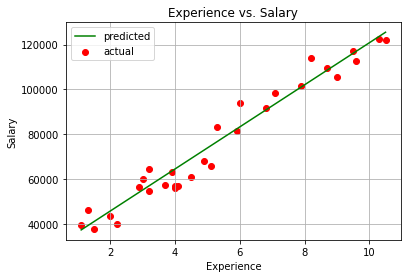

In [88]:
plt.title('Experience vs. Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x, y, color = 'red', label='actual')
plt.plot(x['YearsExperience'], pd.Series(pred), color='green', label='predicted')
plt.legend()

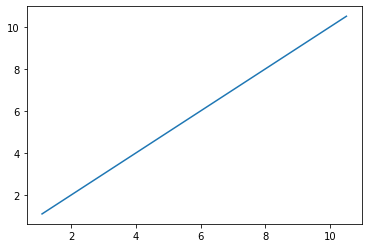

In [87]:
plt.plot(x['YearsExperience'], x['YearsExperience'])

In [83]:
x.shape

(30, 1)

In [82]:
y.shape

(30,)

In [89]:
from scipy.stats import linregress

In [91]:
linregress(x['YearsExperience'], y)

LinregressResult(slope=9449.96232145508, intercept=25792.20019866868, rvalue=0.9782416184887599, pvalue=1.1430681092271558e-20, stderr=378.75457423882153, intercept_stderr=2273.0534325816075)

In [92]:
import seaborn as sns

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

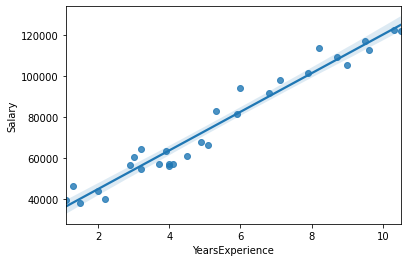

In [93]:
sns.regplot(x='YearsExperience', y='Salary', data=df)